# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [6]:
# Import essential libraries for data manipulation and analysis
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [8]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')
df.head()


market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [12]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [14]:
# Convert categorical features to category type
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')
df['market_id'] = df['market_id'].astype('category')

# converting number to 'int' data type
df['total_items'] = df['total_items'].astype('int')
df['num_distinct_items'] = df['num_distinct_items'].astype('int')
df['total_onshift_dashers'] = df['total_onshift_dashers'].astype('int')
df['total_busy_dashers'] = df['total_busy_dashers'].astype('int')
df['total_outstanding_orders'] = df['total_outstanding_orders'].astype('int')

# converting price columns to float
df['subtotal'] = df['subtotal'].astype('float')
df['min_item_price'] = df['min_item_price'].astype('float')
df['max_item_price'] = df['max_item_price'].astype('float')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  float64       
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  float64       
 9   max_item_price            175777 non-null  float64       
 10  total_onshift_dashers     175777 non-null  int64         
 11  total_busy_dashers        175777 non-null  int64         
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [17]:
# Calculate time taken in minutes
df['delivery_time_in_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
df

market_id          created_at actual_delivery_time  \
0            1.0 2015-02-06 22:24:17  2015-02-06 23:11:17   
1            2.0 2015-02-10 21:49:25  2015-02-10 22:33:25   
2            2.0 2015-02-16 00:11:35  2015-02-16 01:06:35   
3            1.0 2015-02-12 03:36:46  2015-02-12 04:35:46   
4            1.0 2015-01-27 02:12:36  2015-01-27 02:58:36   
...          ...                 ...                  ...   
175772       1.0 2015-02-17 00:19:41  2015-02-17 01:02:41   
175773       1.0 2015-02-13 00:01:59  2015-02-13 01:03:59   
175774       1.0 2015-01-24 04:46:08  2015-01-24 05:32:08   
175775       1.0 2015-02-01 18:18:15  2015-02-01 19:03:15   
175776       1.0 2015-02-08 19:24:33  2015-02-08 20:01:33   

       store_primary_category order_protocol  total_items  subtotal  \
0                           4            1.0            4    3441.0   
1                          46            2.0            1    1900.0   
2                          36            3.0            4    4771.0   
3                          38            1.0            1    1525.0   
4                          38            1.0            2    3620.0   
...                       ...            ...          ...       ...   
175772                     28            4.0            3    1389.0   
175773                     28            4.0            6    3010.0   
175774                     28            4.0            5    1836.0   
175775                     58            1.0            1    1175.0   
175776                     58            1.0            4    2605.0   

        num_distinct_items  min_item_price  max_item_price  \
0                        4           557.0          1239.0   
1                        1          1400.0          1400.0   
2                        3           820.0          1604.0   
3                        1          1525.0          1525.0   
4                        2          1425.0          2195.0   
...                    ...             ...             ...   
175772                   3           345.0           649.0   
175773                   4           405.0           825.0   
175774                   3           300.0           399.0   
175775                   1           535.0           535.0   
175776                   4           425.0           750.0   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                          33                  14                        21   
1                           1                   2                         2   
2                           8                   6                        18   
3                           5                   6                         8   
4                           5                   5                         7   
...                       ...                 ...                       ...   
175772                     17                  17                        23   
175773                     12                  11                        14   
175774                     39                  41                        40   
175775                      7                   7                        12   
175776                     20                  20                        23   

        distance  delivery_time_in_minutes  
0          34.44                      47.0  
1          27.60                      44.0  
2          11.56                      55.0  
3          31.80                      59.0  
4           8.20                      46.0  
...          ...                       ...  
175772     13.24                      43.0  
175773     36.60                      62.0  
175774     31.80                      46.0  
175775     15.36                      45.0  
175776      5.36                      37.0  

[175777 rows x 15 columns]

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [19]:
# Extract the hour and day of week from the 'created_at' timestamp
df['hour_of_day'] = df['created_at'].dt.hour

# Create a categorical feature 'isWeekend' : 1 for weekends else 0
df['day_of_week'] = df['created_at'].dt.day_name()
df['isWeekend'] = df['day_of_week'].apply(lambda x : 1 if x in ('Saturday','Sunday') else 0)
df

market_id          created_at actual_delivery_time  \
0            1.0 2015-02-06 22:24:17  2015-02-06 23:11:17   
1            2.0 2015-02-10 21:49:25  2015-02-10 22:33:25   
2            2.0 2015-02-16 00:11:35  2015-02-16 01:06:35   
3            1.0 2015-02-12 03:36:46  2015-02-12 04:35:46   
4            1.0 2015-01-27 02:12:36  2015-01-27 02:58:36   
...          ...                 ...                  ...   
175772       1.0 2015-02-17 00:19:41  2015-02-17 01:02:41   
175773       1.0 2015-02-13 00:01:59  2015-02-13 01:03:59   
175774       1.0 2015-01-24 04:46:08  2015-01-24 05:32:08   
175775       1.0 2015-02-01 18:18:15  2015-02-01 19:03:15   
175776       1.0 2015-02-08 19:24:33  2015-02-08 20:01:33   

       store_primary_category order_protocol  total_items  subtotal  \
0                           4            1.0            4    3441.0   
1                          46            2.0            1    1900.0   
2                          36            3.0            4    4771.0   
3                          38            1.0            1    1525.0   
4                          38            1.0            2    3620.0   
...                       ...            ...          ...       ...   
175772                     28            4.0            3    1389.0   
175773                     28            4.0            6    3010.0   
175774                     28            4.0            5    1836.0   
175775                     58            1.0            1    1175.0   
175776                     58            1.0            4    2605.0   

        num_distinct_items  min_item_price  max_item_price  \
0                        4           557.0          1239.0   
1                        1          1400.0          1400.0   
2                        3           820.0          1604.0   
3                        1          1525.0          1525.0   
4                        2          1425.0          2195.0   
...                    ...             ...             ...   
175772                   3           345.0           649.0   
175773                   4           405.0           825.0   
175774                   3           300.0           399.0   
175775                   1           535.0           535.0   
175776                   4           425.0           750.0   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                          33                  14                        21   
1                           1                   2                         2   
2                           8                   6                        18   
3                           5                   6                         8   
4                           5                   5                         7   
...                       ...                 ...                       ...   
175772                     17                  17                        23   
175773                     12                  11                        14   
175774                     39                  41                        40   
175775                      7                   7                        12   
175776                     20                  20                        23   

        distance  delivery_time_in_minutes  hour_of_day day_of_week  isWeekend  
0          34.44                      47.0           22      Friday          0  
1          27.60                      44.0           21     Tuesday          0  
2          11.56                      55.0            0      Monday          0  
3          31.80                      59.0            3    Thursday          0  
4           8.20                      46.0            2     Tuesday          0  
...          ...                       ...          ...         ...        ...  
175772     13.24                      43.0            0     Tuesday          0  
175773     36.60                      62.0            0      Friday          0 

In [20]:
# Drop unnecessary columns
# dropping   - 'created_at', 'actual_delivery_time' since we calculated the delivert_time. 
# dropping   - 'day_of_week' since we calculated the isweekend columns in the form of binary results.

df_1 = df.drop(['created_at', 'actual_delivery_time','day_of_week'], axis=1)

df_1

market_id store_primary_category order_protocol  total_items  subtotal  \
0            1.0                      4            1.0            4    3441.0   
1            2.0                     46            2.0            1    1900.0   
2            2.0                     36            3.0            4    4771.0   
3            1.0                     38            1.0            1    1525.0   
4            1.0                     38            1.0            2    3620.0   
...          ...                    ...            ...          ...       ...   
175772       1.0                     28            4.0            3    1389.0   
175773       1.0                     28            4.0            6    3010.0   
175774       1.0                     28            4.0            5    1836.0   
175775       1.0                     58            1.0            1    1175.0   
175776       1.0                     58            1.0            4    2605.0   

        num_distinct_items  min_item_price  max_item_price  \
0                        4           557.0          1239.0   
1                        1          1400.0          1400.0   
2                        3           820.0          1604.0   
3                        1          1525.0          1525.0   
4                        2          1425.0          2195.0   
...                    ...             ...             ...   
175772                   3           345.0           649.0   
175773                   4           405.0           825.0   
175774                   3           300.0           399.0   
175775                   1           535.0           535.0   
175776                   4           425.0           750.0   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                          33                  14                        21   
1                           1                   2                         2   
2                           8                   6                        18   
3                           5                   6                         8   
4                           5                   5                         7   
...                       ...                 ...                       ...   
175772                     17                  17                        23   
175773                     12                  11                        14   
175774                     39                  41                        40   
175775                      7                   7                        12   
175776                     20                  20                        23   

        distance  delivery_time_in_minutes  hour_of_day  isWeekend  
0          34.44                      47.0           22          0  
1          27.60                      44.0           21          0  
2          11.56                      55.0            0          0  
3          31.80                      59.0            3          0  
4           8.20                      46.0            2          0  
...          ...                       ...          ...        ...  
175772     13.24                      43.0            0          0  
175773     36.60                      62.0            0          0  
175774     31.80                      46.0            4          1  
175775     15.36                      45.0           18          1  
175776      5.36                      37.0           19          1  

[175777 rows x 15 columns]

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [23]:
# Define target variable (y) and features (X)

X = df_1[['market_id','store_primary_category' , 'order_protocol', 'total_items','subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price','total_onshift_dashers', 'total_busy_dashers','total_outstanding_orders', 'distance','hour_of_day', 'isWeekend']]
y = df_1['delivery_time_in_minutes']


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [25]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [28]:
# Define numerical and categorical columns for easy EDA and data manipulation

Categorical = ['market_id','store_primary_category','order_protocol','hour_of_day','isWeekend'] 
Numerical = ['total_items','subtotal','num_distinct_items','min_item_price','max_item_price','total_onshift_dashers','total_busy_dashers','total_outstanding_orders','distance']

print(f'Categorical features - {Categorical}\n')
print(f'Numerical features- {Numerical}\n')

print("'hour_of_day','isWeekend' are derived categorical features\n")

print("Additionally,  'delivery_time_in_minutes' is numerical variable")

Categorical features - ['market_id', 'store_primary_category', 'order_protocol', 'hour_of_day', 'isWeekend']

Numerical features- ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']

'hour_of_day','isWeekend' are derived categorical features

Additionally,  'delivery_time_in_minutes' is numerical variable


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

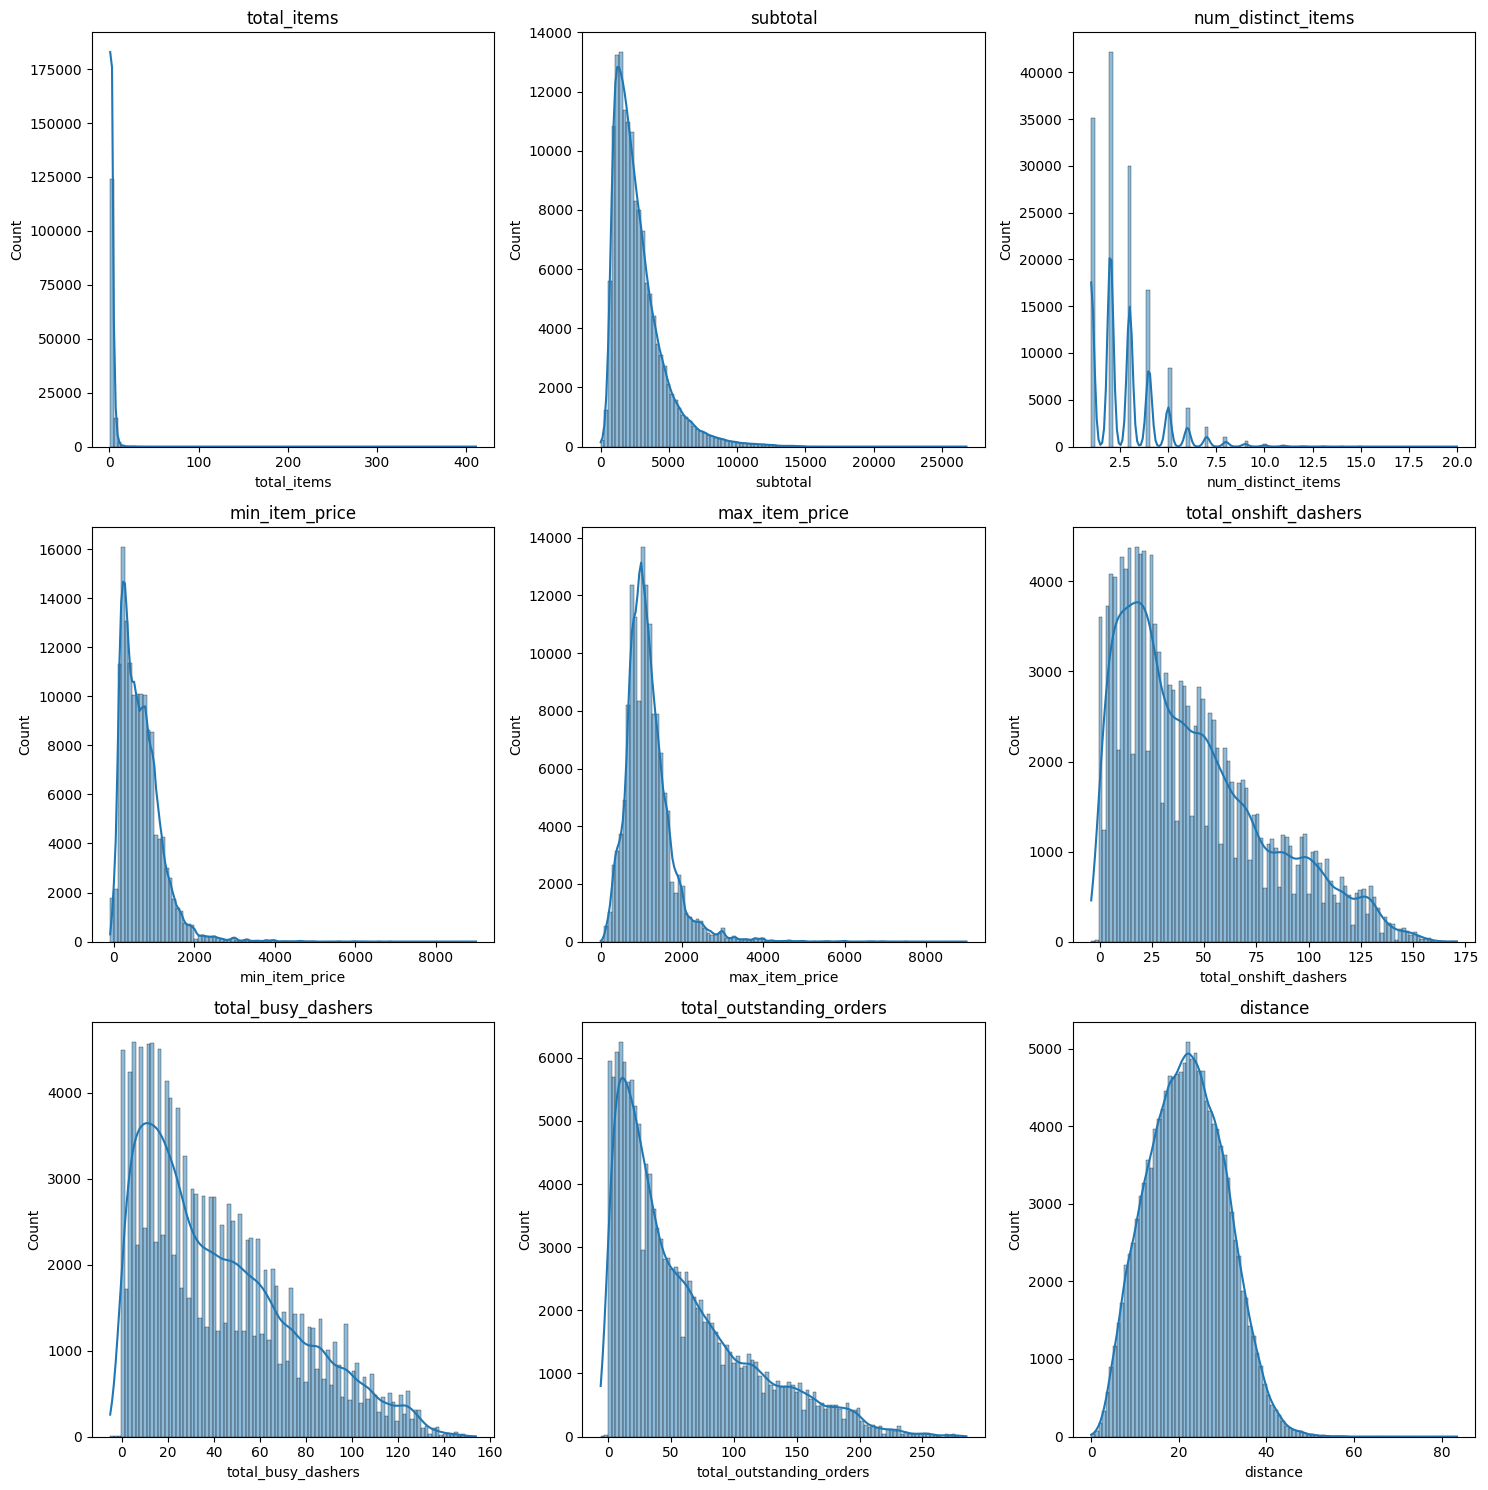

In [30]:
# Plot distributions for all numerical columns
n_cols = 3
n_rows = 3

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(Numerical):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(X_train[col], kde=True, bins=100)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()




##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

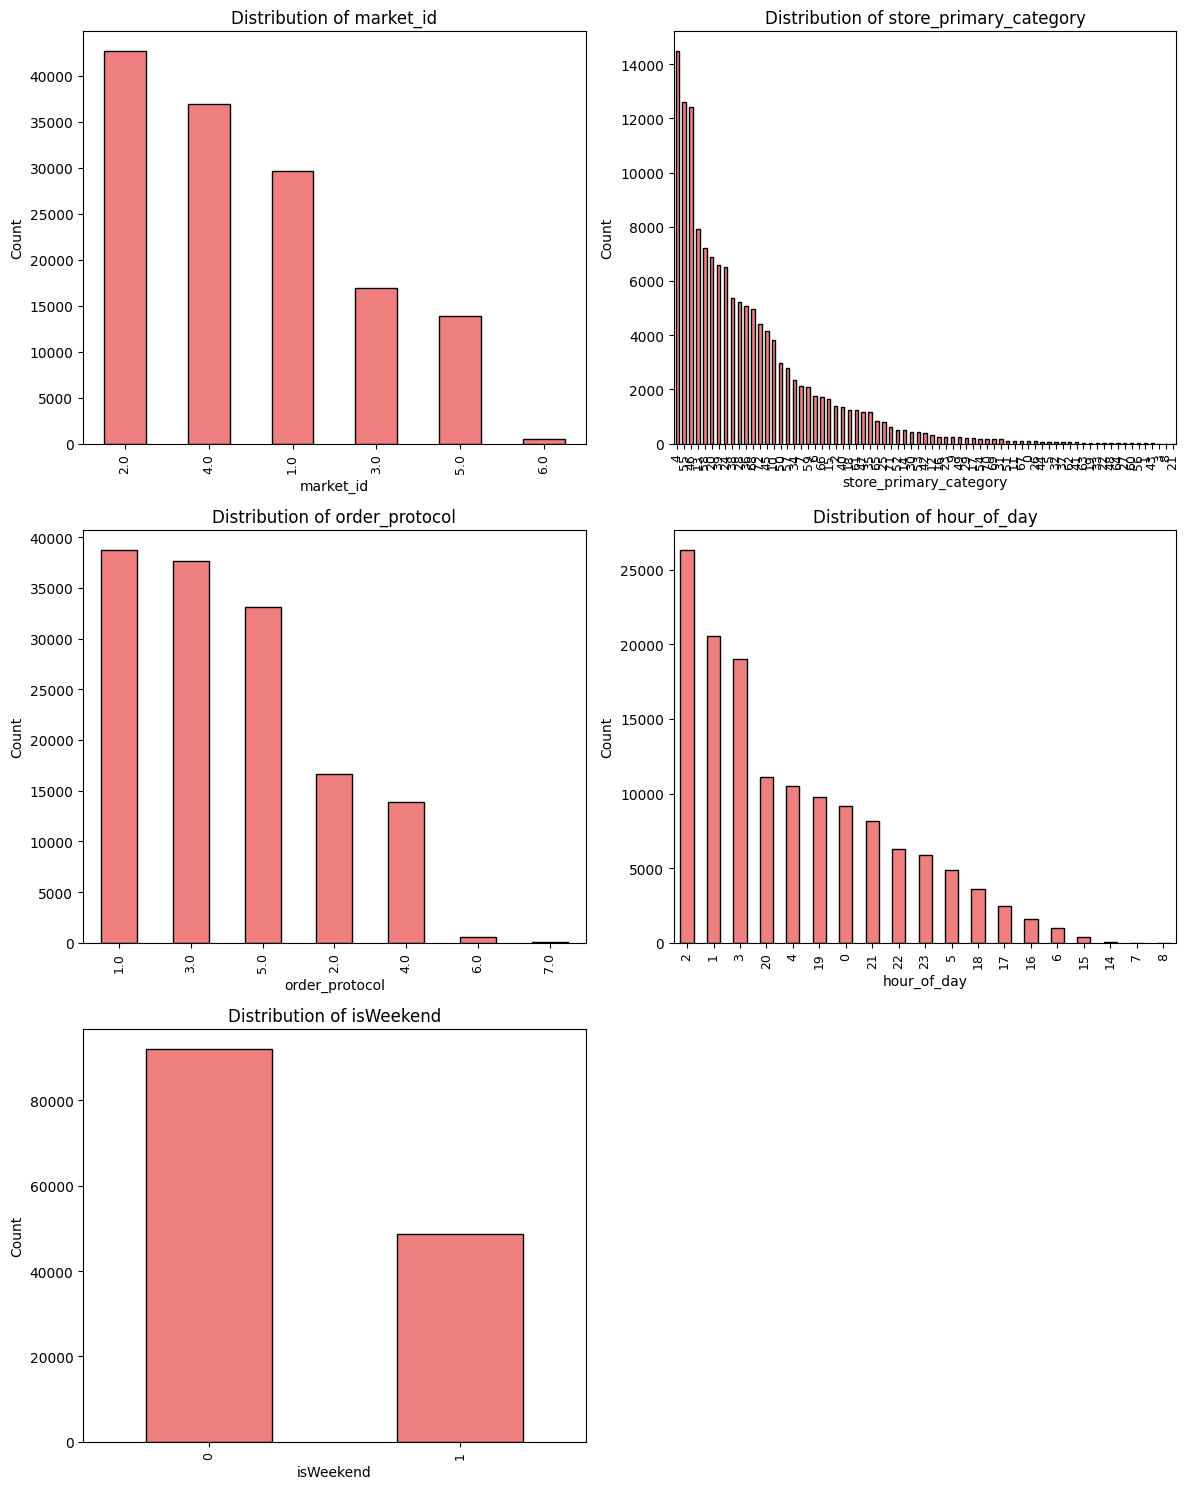

In [32]:
# Distribution of categorical columns

n_cols = 2
n_rows = (len(Categorical) + n_cols - 1) // n_cols

plt.figure(figsize=(12, 5 * n_rows))

for i, col in enumerate(Categorical):
    plt.subplot(n_rows, n_cols, i + 1)
    X_train[col].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90, fontsize=9)

plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

There is slight left skewness the in delivery time.



Text(0, 0.5, 'Count')

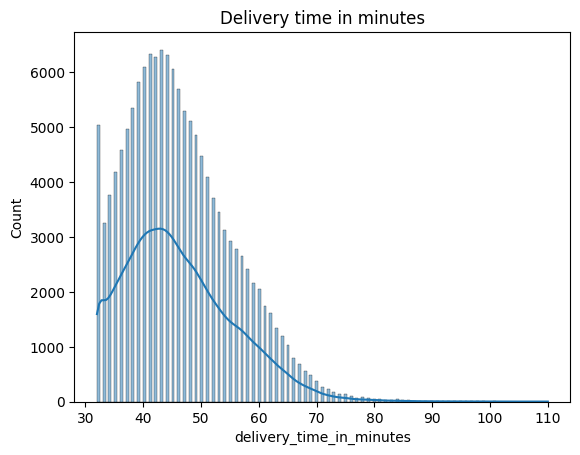

In [34]:
# Distribution of time_taken

print ('There is slight left skewness the in delivery time.\n')
sns.histplot(y_train, kde=True)
plt.title('Delivery time in minutes')
plt.ylabel('Count')

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

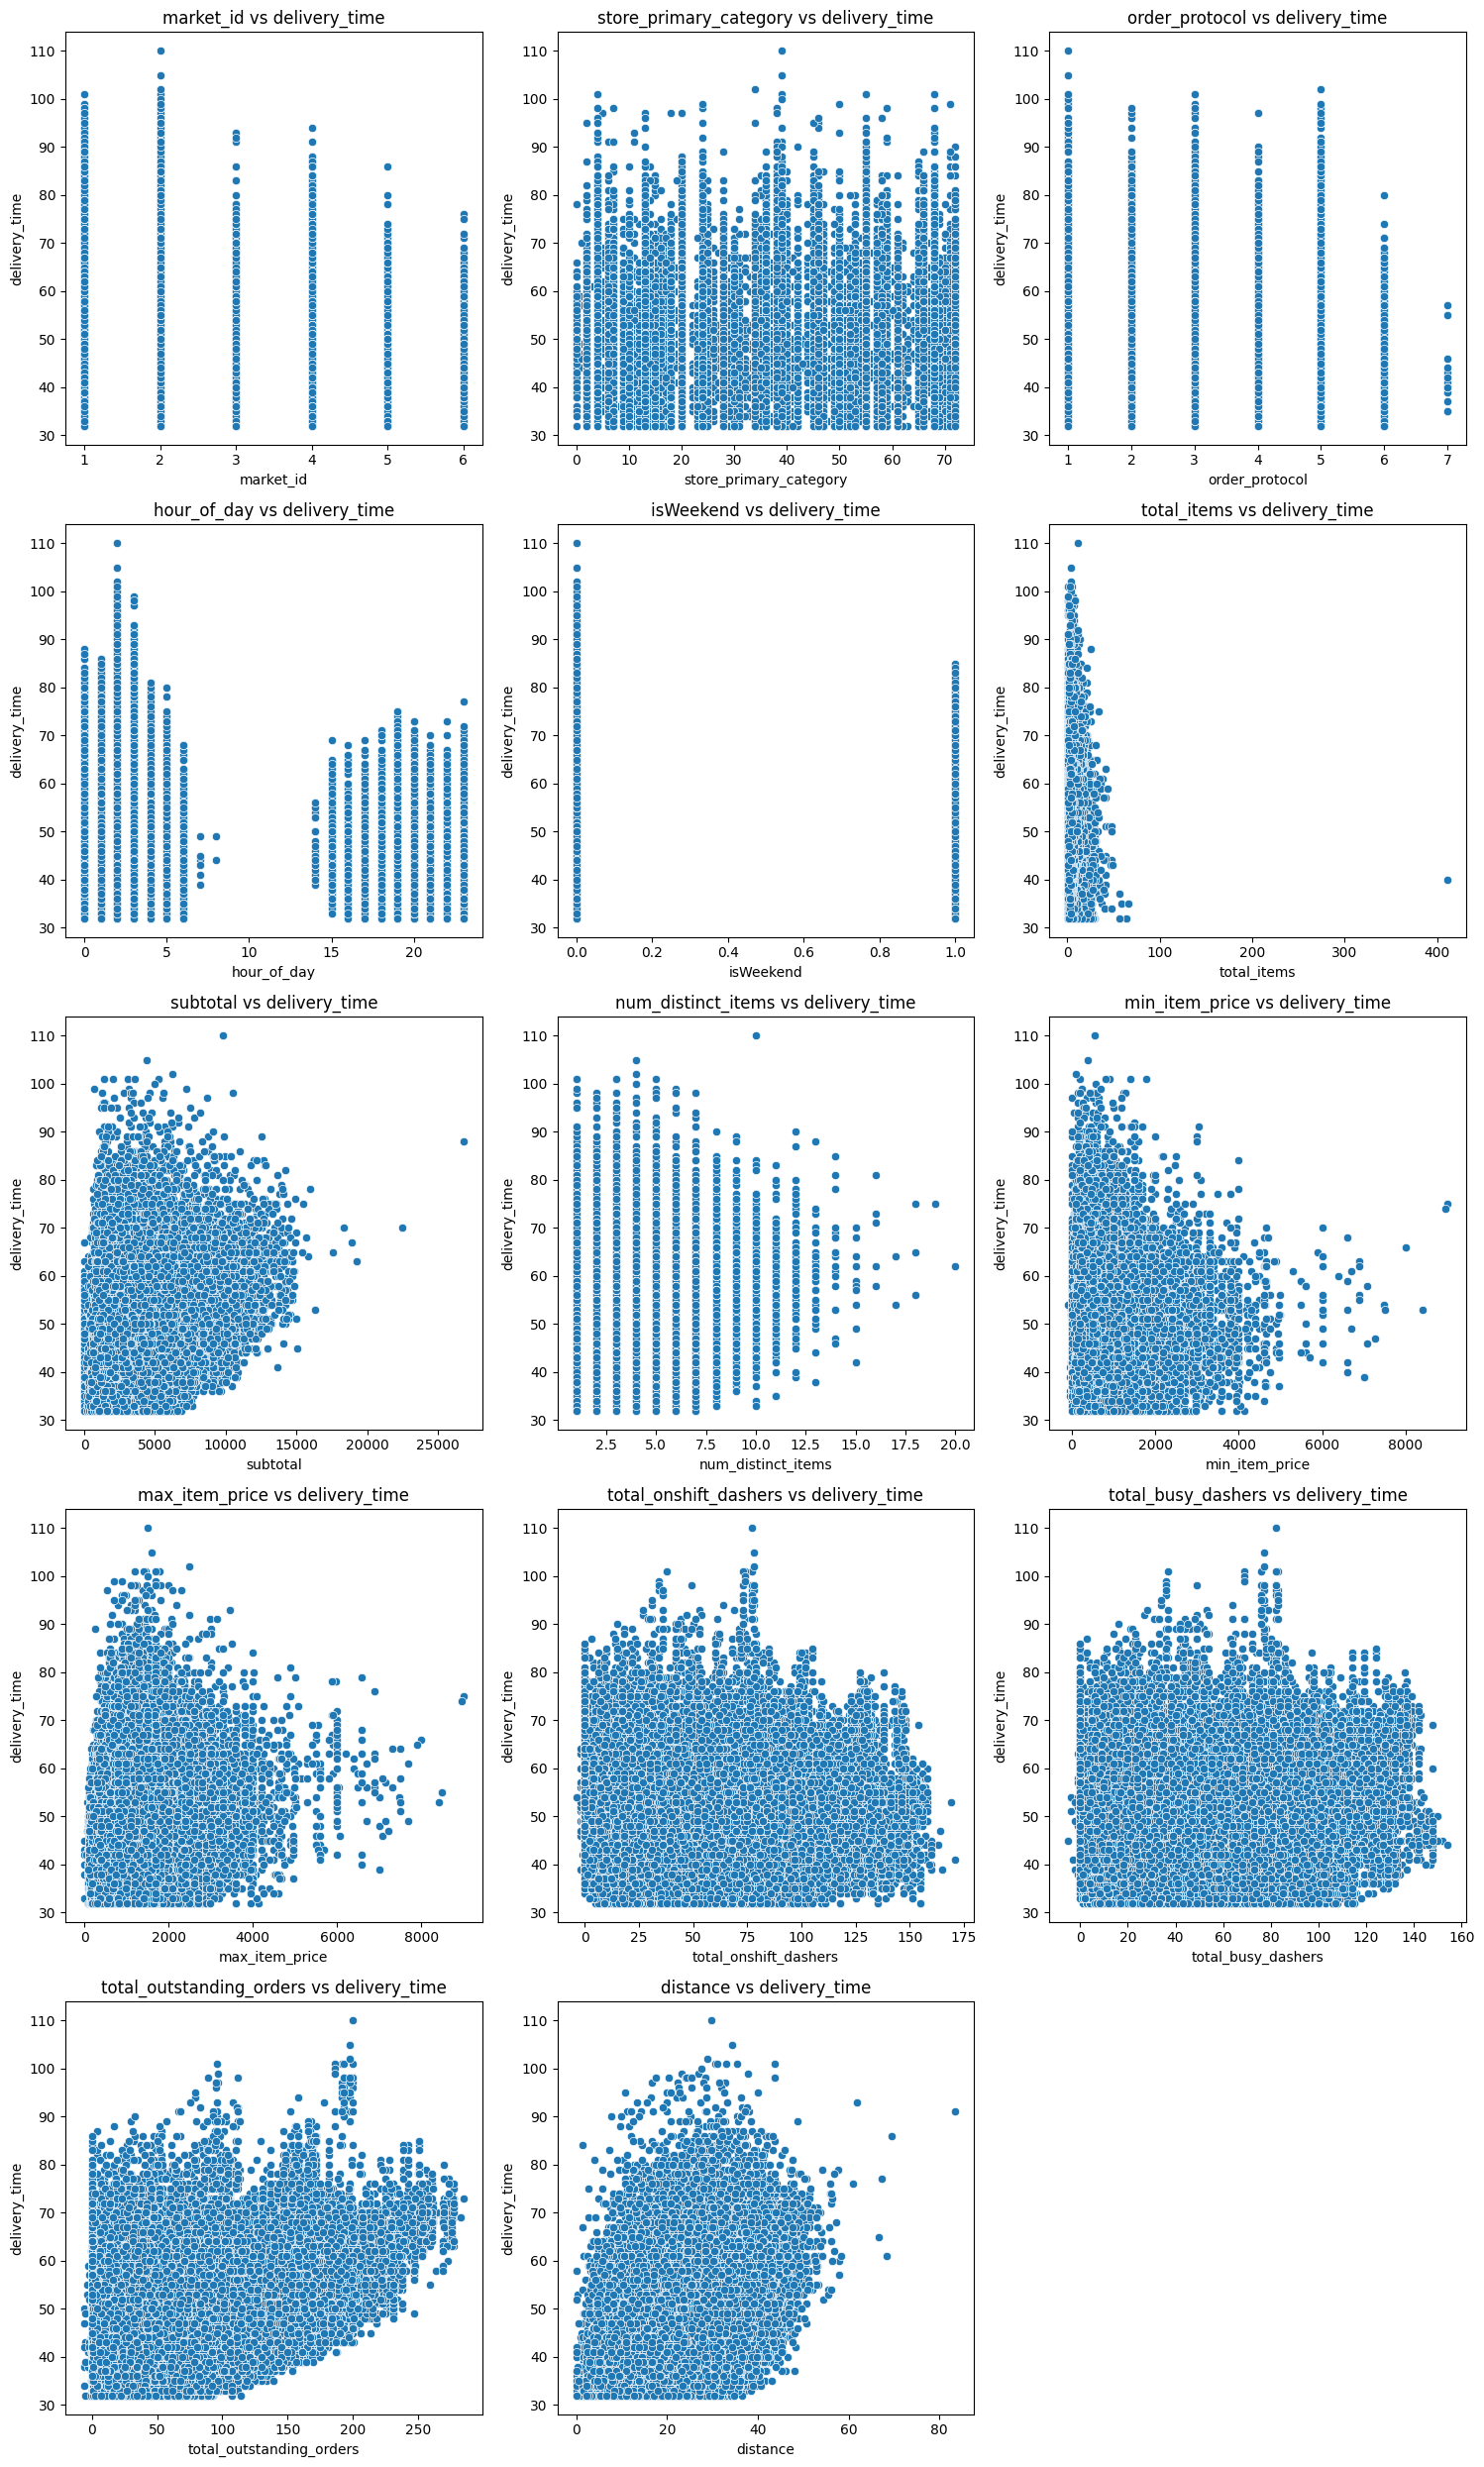

In [37]:
# Scatter plot to visualise the relationship between time_taken and other features

Numerical_Categorical = ['market_id','store_primary_category','order_protocol','hour_of_day','isWeekend','total_items','subtotal','num_distinct_items','min_item_price','max_item_price','total_onshift_dashers','total_busy_dashers','total_outstanding_orders','distance']

#important_numerical = ['distance', 'subtotal', 'total_busy_dashers']  # example features
target = 'delivery_time'

n_cols = 3
n_rows = 5

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(Numerical_Categorical):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=X_train[col], y=y_train)
    
    plt.title(f'{col} vs {target}')
    plt.xlabel(col)
    plt.ylabel(target)

plt.tight_layout()
plt.show()



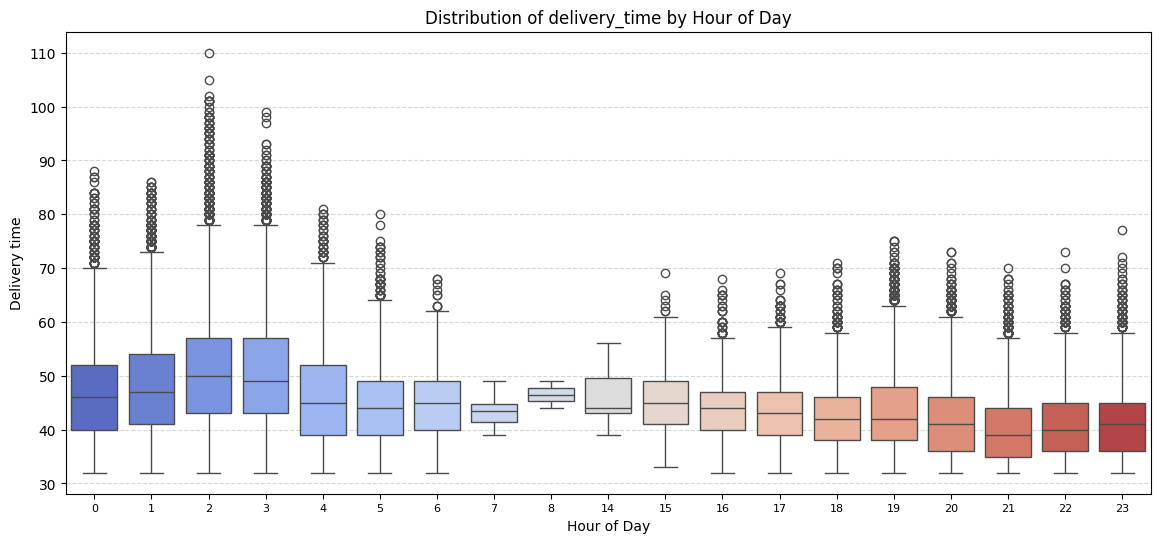

--------------------------------------------------------------------------------------------


In [38]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(14, 6))
sns.boxplot(x=X_train['hour_of_day'], y=y_train, palette='coolwarm')
plt.title('Distribution of delivery_time by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Delivery time')
plt.xticks(fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

print('--------------------------------------------------------------------------------------------')


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

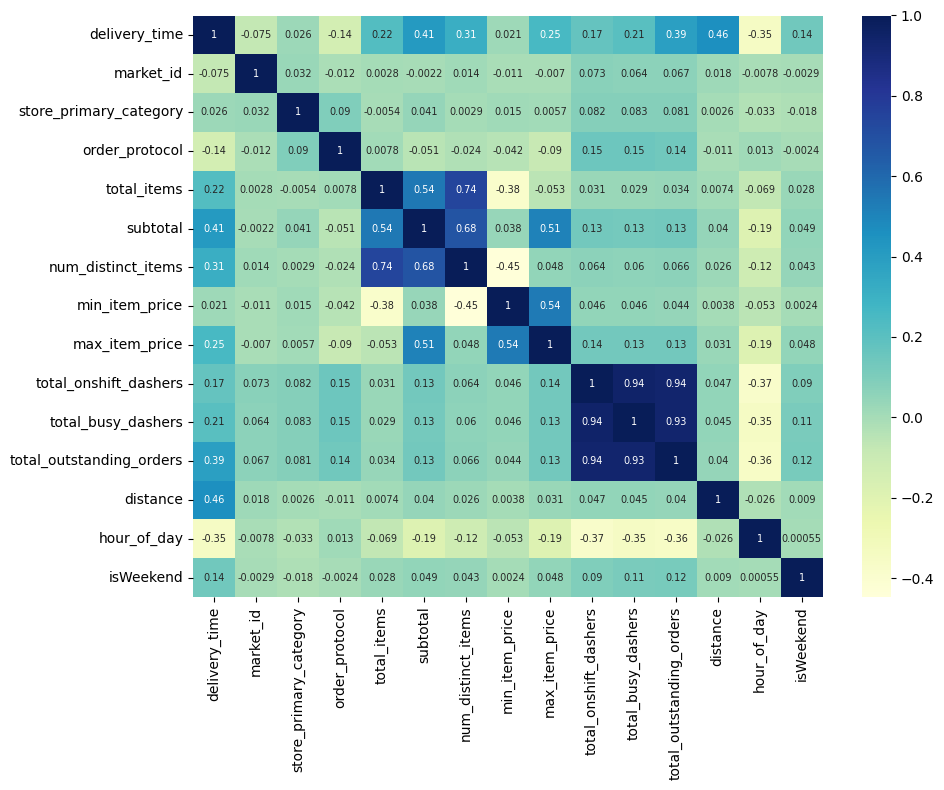

In [41]:
# Plot the heatmap of the correlation matrix
train_data = X_train.copy()
train_data['delivery_time'] = y_train
train_data

Numerical_t = ['delivery_time','market_id', 'store_primary_category', 'order_protocol', 'total_items','subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers','total_outstanding_orders', 'distance', 'hour_of_day', 'isWeekend']
plt.figure(figsize=(10, 8))
sns.heatmap(train_data[Numerical_t].corr(), annot = True, annot_kws={"size": 7}, cmap="YlGnBu")

plt.tight_layout()
plt.show()



##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [43]:
# Drop 3-5 weakly correlated columns from training dataset

print("Droping columns which had lower correlation with delivery time  - \n 1. market_id(-0.075) \n 2. store_primary_category(0.026) \n 3. min_item_price(0.021) ")

train_data_1 = train_data.drop(['market_id','store_primary_category','min_item_price'], axis=1)

print('\n-------------------------------------------------------------------------------------------------\n')
print('Training data post dropping columns which had lower correlation with delivery time')
train_data_1.info()

Droping columns which had lower correlation with delivery time  - 
 1. market_id(-0.075) 
 2. store_primary_category(0.026) 
 3. min_item_price(0.021) 

-------------------------------------------------------------------------------------------------

Training data post dropping columns which had lower correlation with delivery time
<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 102712 to 121958
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   order_protocol            140621 non-null  category
 1   total_items               140621 non-null  int64   
 2   subtotal                  140621 non-null  float64 
 3   num_distinct_items        140621 non-null  int64   
 4   max_item_price            140621 non-null  float64 
 5   total_onshift_dashers     140621 non-null  int64   
 6   total_busy_dashers        140621 non-null  int64   
 7   total_outstanding_orders  140621 non

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

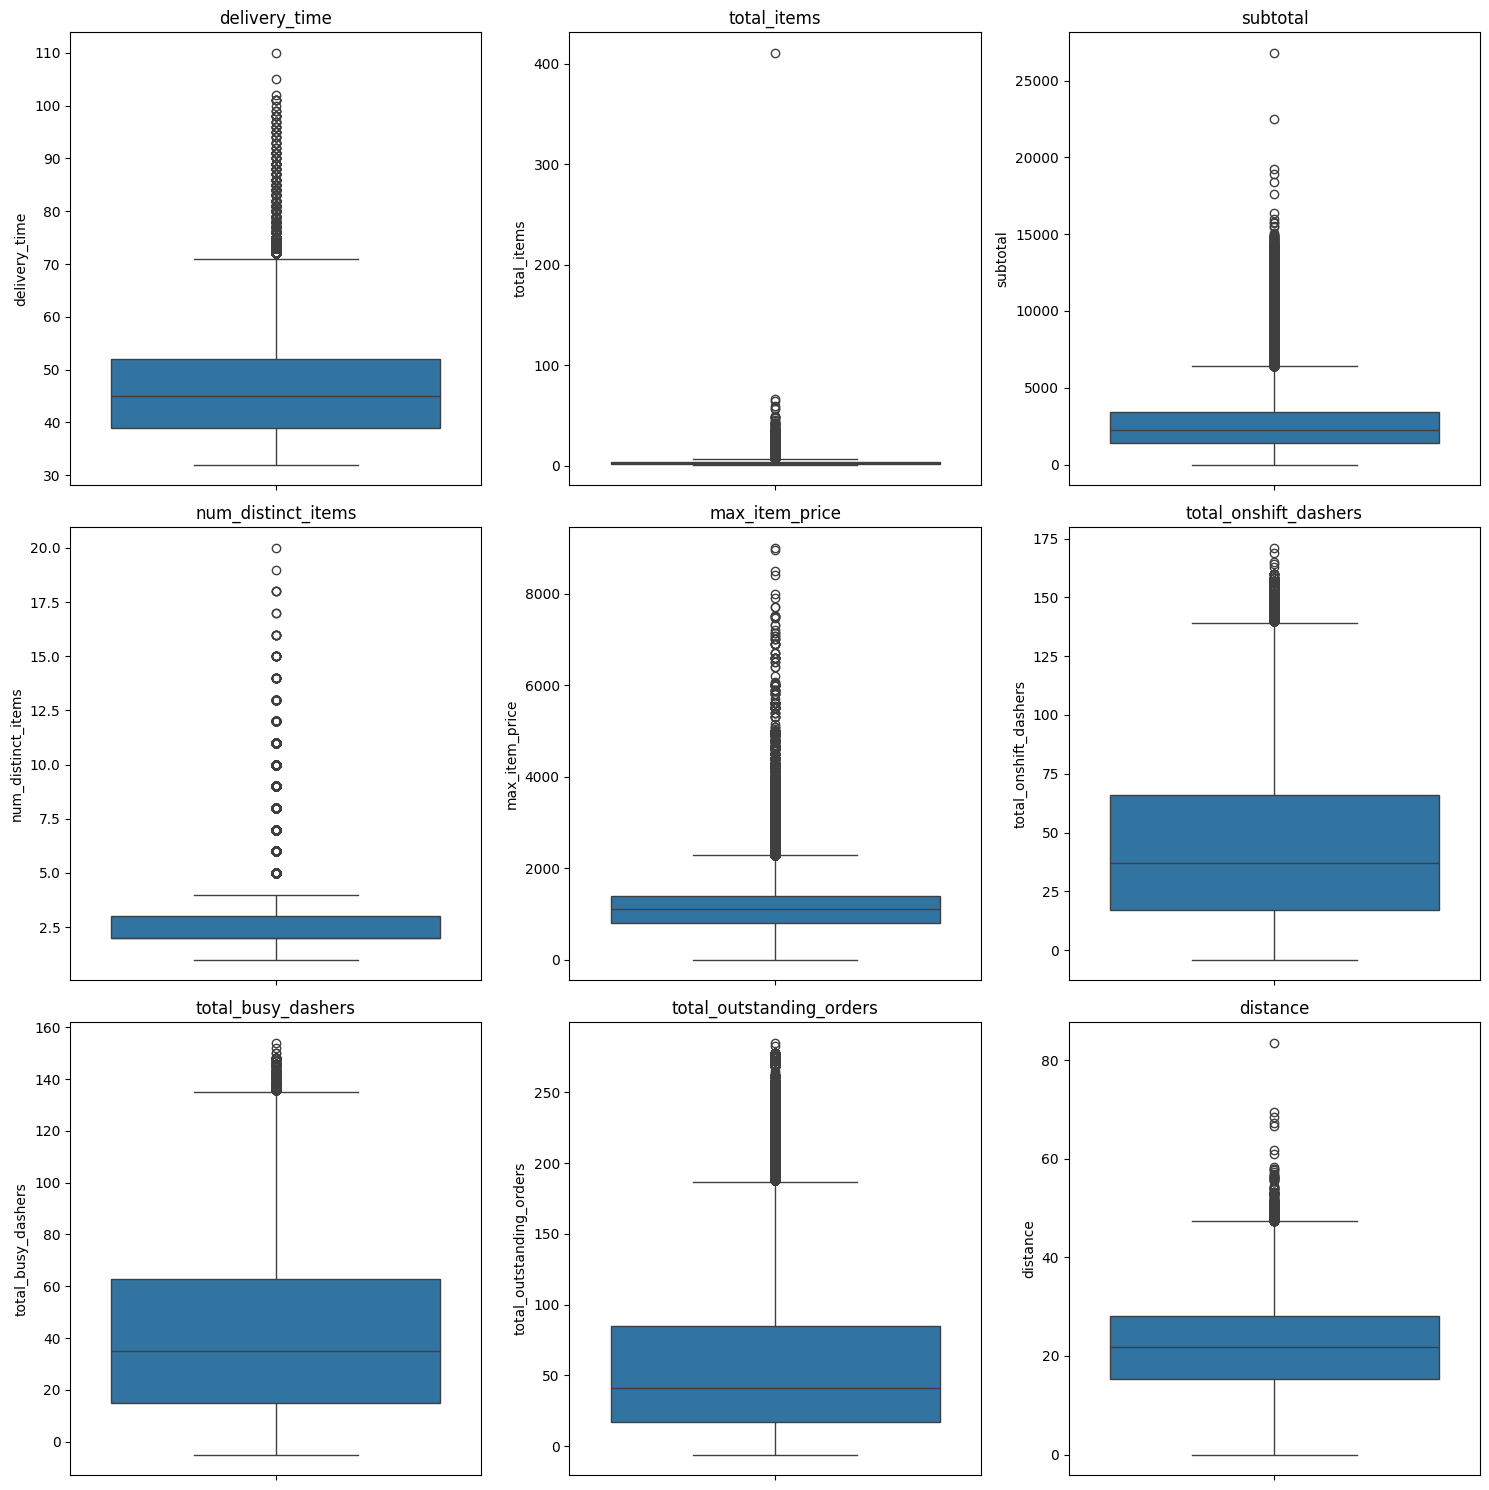

In [46]:
# Boxplot for time_taken
# Plot distributions for all numerical columns
important_col = ['delivery_time','total_items', 'subtotal', 'num_distinct_items','max_item_price', 'total_onshift_dashers', 'total_busy_dashers','total_outstanding_orders', 'distance']

n_cols = 3
n_rows = 3

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(important_col):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(train_data_1[col])
    plt.title(col)

plt.tight_layout()
plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [48]:
# Handle outliers
# checking outiers in numerical columns
columns = ['delivery_time','total_items', 'subtotal', 'num_distinct_items','max_item_price', 'total_onshift_dashers', 'total_busy_dashers','total_outstanding_orders', 'distance']

outlier_summary = {}

for col in columns:
    Q1 = train_data_1[col].quantile(0.25)
    Q3 = train_data_1[col].quantile(0.75)
    lower_bound = Q1 - 1.5*(Q3-Q1)
    upper_bound = Q3 + 1.5*(Q3+Q1)
    outlier_count = train_data_1[(train_data_1[col] < lower_bound) | (train_data_1[col] > upper_bound)].shape[0]
    outlier_summary[col] = {'Lower_Bound' : lower_bound,'Upper_Bound':upper_bound, 'Outlier_count':outlier_count }
outlier_summary

#outlier_summary
train_data_outlier = pd.DataFrame(outlier_summary).T
print('\033[1mOutlier table in numerical columns--->\033[0m\n\n',train_data_outlier)

#### Removing outliers from total_items.Low bound taken as 0, since total_items can not be less than 0
train_data_2 = train_data_1[~((train_data_1['total_items'] < 0) | (train_data_1['total_items'] > 13.00))]

#### Removing outliers from subtotal. Low bound taken as 0, since subtotal can not be less than 0
train_data_3 = train_data_2[~((train_data_2['subtotal'] < 0) | (train_data_2['subtotal'] > 10664.50))]

#### Removing outliers from num_distinct_items. 
train_data_4 = train_data_3[~((train_data_3['num_distinct_items'] < 0.50) | (train_data_3['num_distinct_items'] > 10.50))]

#### Removing outliers from max_item_price. Low bound taken as 0, since max_item_price can not be less than 0
train_data_5 = train_data_4[~((train_data_4['max_item_price'] < 0) | (train_data_4['max_item_price'] > 4686.00))]

#### Removing outliers from total_onshift_dashers. Low bound taken as 0, since total_onshift_dashers can not be less than 0
train_data_6 = train_data_5[~((train_data_5['total_onshift_dashers'] < 0))]

#### Removing outliers from total_busy_dashers. Low bound taken as 0, since total_busy_dashers can not be less than 0
train_data_7 = train_data_6[~((train_data_6['total_busy_dashers'] < 0))]

#### Removing outliers from total_outstanding_orders. Low bound taken as 0, since total_outstanding_orders can not be less than 0
train_data_8 = train_data_7[~((train_data_7['total_outstanding_orders'] < 0) | (train_data_7['total_outstanding_orders'] > 238.00) )]

#### Removing outliers from distance. Low bound taken as 0, since distance can not be less than 0
train_data_9 = train_data_8[~((train_data_8['distance'] < 0))]

print('\n\033[1m--------------------------------------------------\033[0m\n')
print('\n\033[1mDescribing data to check outliers, post outlier handling. No values in numerical columns are outside the lower and upper bound.\033[0m \n')
train_data_9.describe()



Outlier table in numerical columns--->

                           Lower_Bound  Upper_Bound  Outlier_count
delivery_time                   19.50       188.50            0.0
total_items                     -1.00        13.00         1066.0
subtotal                     -1577.50     10664.50          783.0
num_distinct_items               0.50        10.50          306.0
max_item_price                 -95.00      4686.00          186.0
total_onshift_dashers          -56.50       190.50            0.0
total_busy_dashers             -57.00       180.00            0.0
total_outstanding_orders       -85.00       238.00          461.0
distance                        -3.88        93.28            0.0

--------------------------------------------------


Describing data to check outliers, post outlier handling. No values in numerical columns are outside the lower and upper bound. 



total_items       subtotal  num_distinct_items  max_item_price  \
count  138200.000000  138200.000000       138200.000000   138200.000000   
mean        3.055991    2626.058922            2.617721     1153.162127   
std         1.974429    1658.427038            1.510108      528.210638   
min         1.000000       0.000000            1.000000        0.000000   
25%         2.000000    1400.000000            1.000000      799.000000   
50%         3.000000    2200.000000            2.000000     1095.000000   
75%         4.000000    3384.000000            3.000000     1395.000000   
max        13.000000   10660.000000           10.000000     4669.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          138200.000000       138200.000000             138200.000000   
mean               44.673227           41.628119                 57.633003   
std                34.269555           31.869459                 51.627071   
min                 0.000000            0.000000                  0.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           34.000000                 41.000000   
75%                65.000000           62.000000                 85.000000   
max               171.000000          154.000000                238.000000   

            distance    hour_of_day      isWeekend  delivery_time  
count  138200.000000  138200.000000  138200.000000  138200.000000  
mean       21.844467       8.496035       0.343625      46.006245  
std         8.751265       8.685909       0.474920       9.156582  
min         0.000000       0.000000       0.000000      32.000000  
25%        15.320000       2.000000       0.000000      39.000000  
50%        21.760000       3.000000       0.000000      45.000000  
75%        28.120000      19.000000       1.000000      52.000000  
max        83.520000      23.000000       1.000000     110.000000

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [50]:
# Define numerical and categorical columns for easy EDA and data manipulation





#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [53]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [55]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [57]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [59]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [61]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [64]:
# Import libraries

import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [66]:
# Apply scaling to the numerical columns


train_data_9.columns

num_vars = ['order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour_of_day', 'delivery_time']

train_data_9[num_vars] = scaler.fit_transform(train_data_9[num_vars])

train_data_9.head()

# splitting the columns for X and y for train set, post outlier treatment and scaling.

X_train_cleaned = train_data_9.drop('delivery_time', axis=1)
y_train_cleaned = train_data_9['delivery_time']
X_train_cleaned



order_protocol  total_items  subtotal  num_distinct_items  \
102712        0.166667     0.000000  0.076923            0.000000   
94576         0.333333     0.000000  0.093340            0.000000   
49784         0.333333     0.250000  0.191370            0.333333   
37753         0.000000     0.083333  0.222889            0.111111   
91728         0.000000     0.000000  0.134146            0.000000   
...                ...          ...       ...                 ...   
119879        0.666667     0.000000  0.104221            0.000000   
103694        0.000000     0.250000  0.270169            0.222222   
131932        0.666667     0.083333  0.168762            0.111111   
146867        0.166667     0.750000  0.376642            0.333333   
121958        0.333333     0.250000  0.464447            0.333333   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
102712        0.159563               0.204678            0.253247   
94576         0.213108               0.643275            0.467532   
49784         0.191690               0.035088            0.019481   
37753         0.299636               0.093567            0.110390   
91728         0.282716               0.374269            0.305195   
...                ...                    ...                 ...   
119879        0.237952               0.181287            0.201299   
103694        0.170272               0.555556            0.519481   
131932        0.192547               0.105263            0.116883   
146867        0.182052               0.152047            0.155844   
121958        0.299636               0.274854            0.175325   

        total_outstanding_orders  distance  hour_of_day  isWeekend  
102712                  0.235294  0.363027     0.913043          0  
94576                   0.487395  0.373084     0.086957          0  
49784                   0.029412  0.217433     0.913043          0  
37753                   0.079832  0.400383     0.130435          0  
91728                   0.218487  0.377874     0.913043          0  
...                          ...       ...          ...        ...  
119879                  0.142857  0.443487     1.000000          1  
103694                  0.466387  0.331897     0.130435          0  
131932                  0.063025  0.262452     0.043478          0  
146867                  0.117647  0.282567     0.130435          1  
121958                  0.113445  0.215996     0.130435          0  

[138200 rows x 11 columns]

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [70]:
# Create/Initialise the model
X_train_cleaned_sm = sm.add_constant(X_train_cleaned)
X_train_cleaned_sm

const  order_protocol  total_items  subtotal  num_distinct_items  \
102712    1.0        0.166667     0.000000  0.076923            0.000000   
94576     1.0        0.333333     0.000000  0.093340            0.000000   
49784     1.0        0.333333     0.250000  0.191370            0.333333   
37753     1.0        0.000000     0.083333  0.222889            0.111111   
91728     1.0        0.000000     0.000000  0.134146            0.000000   
...       ...             ...          ...       ...                 ...   
119879    1.0        0.666667     0.000000  0.104221            0.000000   
103694    1.0        0.000000     0.250000  0.270169            0.222222   
131932    1.0        0.666667     0.083333  0.168762            0.111111   
146867    1.0        0.166667     0.750000  0.376642            0.333333   
121958    1.0        0.333333     0.250000  0.464447            0.333333   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
102712        0.159563               0.204678            0.253247   
94576         0.213108               0.643275            0.467532   
49784         0.191690               0.035088            0.019481   
37753         0.299636               0.093567            0.110390   
91728         0.282716               0.374269            0.305195   
...                ...                    ...                 ...   
119879        0.237952               0.181287            0.201299   
103694        0.170272               0.555556            0.519481   
131932        0.192547               0.105263            0.116883   
146867        0.182052               0.152047            0.155844   
121958        0.299636               0.274854            0.175325   

        total_outstanding_orders  distance  hour_of_day  isWeekend  
102712                  0.235294  0.363027     0.913043          0  
94576                   0.487395  0.373084     0.086957          0  
49784                   0.029412  0.217433     0.913043          0  
37753                   0.079832  0.400383     0.130435          0  
91728                   0.218487  0.377874     0.913043          0  
...                          ...       ...          ...        ...  
119879                  0.142857  0.443487     1.000000          1  
103694                  0.466387  0.331897     0.130435          0  
131932                  0.063025  0.262452     0.043478          0  
146867                  0.117647  0.282567     0.130435          1  
121958                  0.113445  0.215996     0.130435          0  

[138200 rows x 12 columns]

                            OLS Regression Results                            
Dep. Variable:          delivery_time   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                 8.367e+04
Date:                Wed, 28 May 2025   Prob (F-statistic):               0.00
Time:                        12:44:16   Log-Likelihood:             2.4065e+05
No. Observations:              138200   AIC:                        -4.813e+05
Df Residuals:                  138188   BIC:                        -4.812e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Text(0.5, 0, 'Errors')

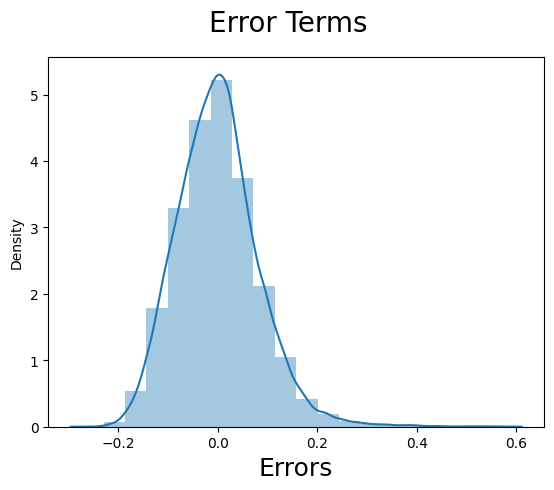

In [71]:
# Train the model using the training data
lr = sm.OLS(y_train_cleaned, X_train_cleaned_sm).fit()
print(lr.summary())

print('\n=========================================================================\n')

print('\n\n All the independent variables are significant because p value < 0.05 and hence, checking for high VIF values\n\n')

print('=========================================================================')

vif = pd.DataFrame()
vif['Features'] = X_train_cleaned.columns
vif['VIF'] = [variance_inflation_factor(X_train_cleaned.values, i) for i in range(X_train_cleaned.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)
print('\n=========================================================================\n')

print('Iteration 1: \n ')
print('\n=========================================================================\n')

print ('Dropping total_onshift_dashers due to higher VIF even though p value is low.')

X_train_cleaned_new = X_train_cleaned.drop(['total_onshift_dashers'], axis=1)

X_train_cleaned_new_sm = sm.add_constant(X_train_cleaned_new)
X_train_cleaned_new_sm

lr_new = sm.OLS(y_train_cleaned, X_train_cleaned_new_sm).fit()

print(lr_new.summary())

print('\n=========================================================================\n')

vif_1 = pd.DataFrame()
vif_1['Features'] = X_train_cleaned_new.columns
vif_1['VIF'] = [variance_inflation_factor(X_train_cleaned_new.values, i) for i in range(X_train_cleaned_new.shape[1])]
vif_1['VIF'] = round(vif_1['VIF'], 2)
vif_1 = vif_1.sort_values(by = "VIF", ascending = False)
print(vif_1)

print('\n Iteration 2: \n ')
print('\n=========================================================================\n')

print ('Dropping total_busy_dashers due to higher VIF even though p value is low.')

X_train_cleaned_new_1 = X_train_cleaned_new.drop(['total_busy_dashers'], axis=1)

X_train_cleaned_new_1_sm = sm.add_constant(X_train_cleaned_new_1)
X_train_cleaned_new_1_sm

lr_new_1 = sm.OLS(y_train_cleaned, X_train_cleaned_new_1_sm).fit()

print(lr_new_1.summary())

vif_2 = pd.DataFrame()
vif_2['Features'] = X_train_cleaned_new_1.columns
vif_2['VIF'] = [variance_inflation_factor(X_train_cleaned_new_1.values, i) for i in range(X_train_cleaned_new_1.shape[1])]
vif_2['VIF'] = round(vif_2['VIF'], 2)
vif_2 = vif_2.sort_values(by = "VIF", ascending = False)
print(vif_2)

print('\n Iteration 3: \n ')
print('\n=========================================================================\n')

print ('Dropping total_items due to higher p')

X_train_cleaned_new_2 = X_train_cleaned_new_1.drop(['total_items'], axis=1)

X_train_cleaned_new_2_sm = sm.add_constant(X_train_cleaned_new_2)
X_train_cleaned_new_2_sm

lr_new_2 = sm.OLS(y_train_cleaned, X_train_cleaned_new_2_sm).fit()

print(lr_new_2.summary())

vif_3 = pd.DataFrame()
vif_3['Features'] = X_train_cleaned_new_2.columns
vif_3['VIF'] = [variance_inflation_factor(X_train_cleaned_new_2.values, i) for i in range(X_train_cleaned_new_2.shape[1])]
vif_3['VIF'] = round(vif_3['VIF'], 2)
vif_3 = vif_3.sort_values(by = "VIF", ascending = False)
print(vif_3)

print('\n Iteration 4:')
print('\n=========================================================================\n')

print ('Dropping subtotal due to higher VIF even though p value is low.')

X_train_cleaned_new_3 = X_train_cleaned_new_2.drop(['subtotal'], axis=1)

X_train_cleaned_new_3_sm = sm.add_constant(X_train_cleaned_new_3)
X_train_cleaned_new_3_sm

lr_new_3 = sm.OLS(y_train_cleaned, X_train_cleaned_new_3_sm).fit()

print(lr_new_3.summary())

vif_4 = pd.DataFrame()
vif_4['Features'] = X_train_cleaned_new_3.columns
vif_4['VIF'] = [variance_inflation_factor(X_train_cleaned_new_3.values, i) for i in range(X_train_cleaned_new_3.shape[1])]
vif_4['VIF'] = round(vif_4['VIF'], 2)
vif_4 = vif_4.sort_values(by = "VIF", ascending = False)
print(vif_4)

##### residual analysis of the train data
y_train_delivery_time = lr_new_3.predict(X_train_cleaned_new_3_sm)

fig = plt.figure()
sns.distplot((y_train_cleaned - y_train_delivery_time), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  


In [72]:
# Make predictions

test_data = X_test.copy()
test_data['delivery_time'] = y_test
test_data

#### Dropping of columns based on lower correlation values - as done in training set
test_data_1 = test_data.drop(['market_id','store_primary_category','min_item_price'], axis=1)
test_data_1

#### Transformation of the test set based on same set of columns in training set
num_vars = ['order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour_of_day','delivery_time']

test_data_1[num_vars] = scaler.transform(test_data_1[num_vars])
test_data_1.describe()


y_test_trans = test_data_1.pop('delivery_time')
X_test_trans = test_data_1[X_train_cleaned_new_3.columns]

# Add a constant to X_test
X_test_sm = sm.add_constant(X_test_trans)
X_test_sm


# Predict the y values corresponding to X_test_sm
y_test_pred = lr_new_3.predict(X_test_sm)


r_squared -->  0.51


Text(0, 0.5, 'y_pred')

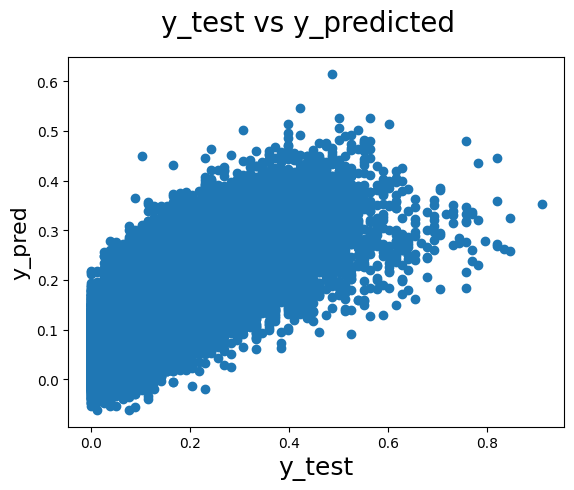

In [73]:
# Find results for evaluation metrics
r_squared = r2_score(y_test_trans, y_test_pred)
print('\033[1mr_squared\033[0m --> ',round(r_squared,2))


fig = plt.figure()
plt.scatter(y_test_trans, y_test_pred)
fig.suptitle('y_test vs y_predicted', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.



Approach1 - Dropping variables with VIF > 5


                            OLS Regression Results                            
Dep. Variable:          delivery_time   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 1.100e+05
Date:                Wed, 28 May 2025   Prob (F-statistic):               0.00
Time:                        12:44:19   Log-Likelihood:             2.3798e+05
No. Observations:              138200   AIC:                        -4.759e+05
Df Residuals:                  138191   BIC:                        -4.759e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

Text(0.5, 0, 'Errors')

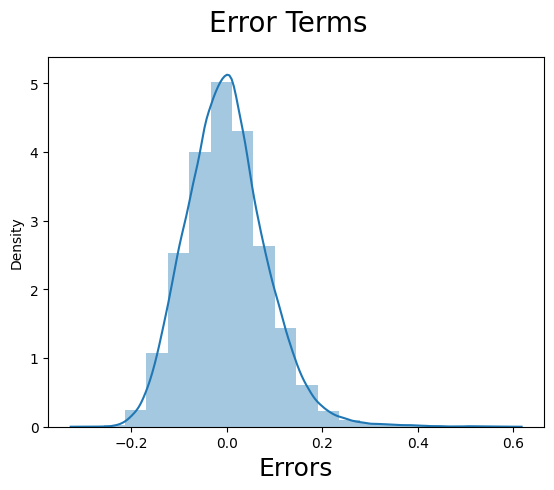

In [77]:
# Loop through the number of features and test the model


## Approach - Dropping variables with VIF > 5

print ('\n\n\033[1mApproach1 - Dropping variables with VIF > 5\033[0m\n\n')

lm = LinearRegression()
lm.fit(X_train_cleaned, y_train_cleaned)

rfe = RFE(estimator=lm, n_features_to_select=8)
rfe = rfe.fit(X_train_cleaned, y_train_cleaned)

list(zip(X_train_cleaned.columns,rfe.support_,rfe.ranking_))

col = X_train_cleaned.columns[rfe.support_]
col

X_train_rfe = X_train_cleaned[col]
X_train_rfe

X_train_rfe_sm = sm.add_constant(X_train_rfe)
X_train_rfe_sm

lm1 = sm.OLS(y_train_cleaned,X_train_rfe_sm).fit()
print(lm1.summary())

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

print('Iteration 1: \n ')
print('\n=========================================================================\n')

print ('Dropping total_onshift_dashers due to higher VIF even through p value is low.')

X_train_rfe_1 = X_train_rfe.drop(['total_onshift_dashers'], axis=1)

X_train_rfe_1_sm = sm.add_constant(X_train_rfe_1)
X_train_rfe_1_sm

lm2 = sm.OLS(y_train_cleaned,X_train_rfe_1_sm).fit()
print(lm2.summary())

vif = pd.DataFrame()
X = X_train_rfe_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)


print('\n\nIteration 2: \n ')
print('\n=========================================================================\n')

print ('Dropping total_busy_dashers due to higher VIF even through p value is low.')


X_train_rfe_2 = X_train_rfe_1.drop(['total_busy_dashers'], axis=1)

X_train_rfe_2_sm = sm.add_constant(X_train_rfe_2)
X_train_rfe_2_sm

lm3 = sm.OLS(y_train_cleaned,X_train_rfe_2_sm).fit()
print(lm3.summary())

vif = pd.DataFrame()
X = X_train_rfe_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

print('\n\nIteration 3: \n ')
print('\n=========================================================================\n')

print ('Dropping subtotal due to higher VIF (>5) even through p value is low.')

X_train_rfe_3 = X_train_rfe_2.drop(['subtotal'], axis=1)

X_train_rfe_3_sm = sm.add_constant(X_train_rfe_3)
X_train_rfe_3_sm

lm4 = sm.OLS(y_train_cleaned,X_train_rfe_3_sm).fit()
print(lm4.summary())

vif = pd.DataFrame()
X = X_train_rfe_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

print('\n\nConclusion:- Post removing the multicollinear variable with high VIF > 5, the model R squared values goes below 0.5 \n\n')

############# residual value on train set

y_train_rfe_pred = lm4.predict(X_train_rfe_3_sm)

fig = plt.figure()
sns.distplot((y_train_cleaned - y_train_rfe_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  



r_squared -->  0.48


Text(0, 0.5, 'y_pred')

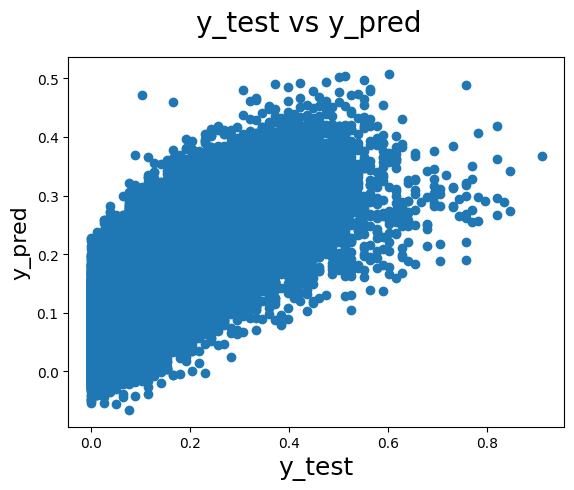

In [78]:
# Build the final model with selected number of features

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = test_data_1[X_train_rfe_3.columns]

# Adding a constant variable 
X_test_new_sm = sm.add_constant(X_test_new)

y_pred = lm4.predict(X_test_new_sm)

r_squared_rfe = r2_score(y_test_trans, y_pred)

print('\n\033[1mr_squared\033[0m --> ',round(r_squared_rfe,2))

fig = plt.figure()
plt.scatter(y_test_trans,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

Residual analysis on training set- RFE model


--------------------------------------------------------------------------------------




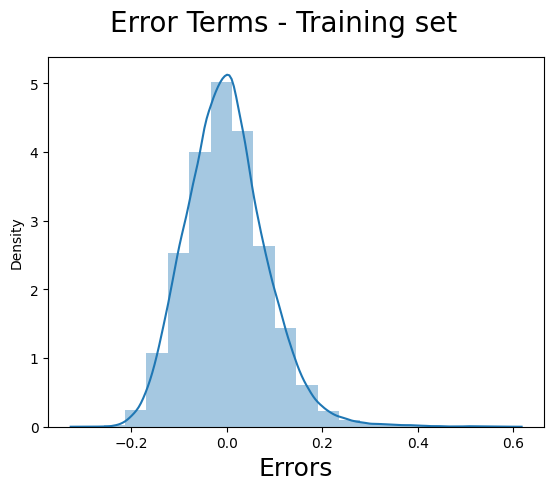

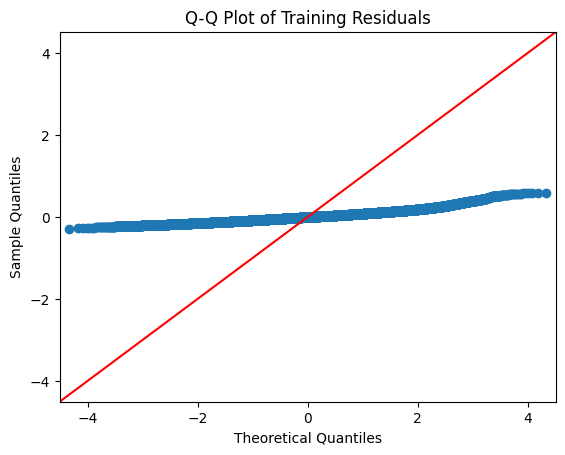



--------------------------------------------------------------------------------------




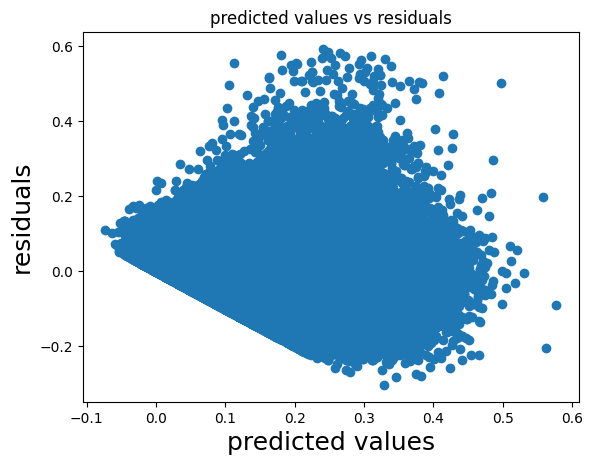



--------------------------------------------------------------------------------------




In [81]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

print('Residual analysis on training set- RFE model')

training_res_rfe = y_train_cleaned - y_train_rfe_pred


fig = plt.figure()
sns.distplot(training_res_rfe, bins = 20)
fig.suptitle('Error Terms - Training set ', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

print ('\n\n--------------------------------------------------------------------------------------\n\n')


sm.qqplot(training_res_rfe, line='45')
plt.title("Q-Q Plot of Training Residuals")
plt.show()


print ('\n\n--------------------------------------------------------------------------------------\n\n')


plt.scatter(y_train_rfe_pred,training_res_rfe)
plt.title("predicted values vs residuals")
plt.xlabel('predicted values', fontsize = 18)  
plt.ylabel('residuals', fontsize = 18)  
plt.show()

print ('\n\n--------------------------------------------------------------------------------------\n\n')


[Your inferences here:]

- Residual analysis on training set - Show near to normal distribution.
- QQ plot shows a symmetric heavy tailed distribution. It has heavy tails on both sides. 
- Predicted values vs Residual analysis shows that value are not centred around 0.0. It shows some level of heteroscedasticity

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [85]:
# Compare the scaled vs unscaled features used in the final model

print ('\n In model building via linear regression,\ndelivery_time = 0.4928 * distance + 0.1601 * num_distinct_items + 0.1440 * total_outstanding_orders + 0.1404 * max_item_price + 0.0203 * isWeekend - 0.0564 * hour_of_day - 0.0708 * order_protocol')

print ('\n In model building via RFE,\ndelivery_time = 0.4962 * distance + 0.1650 * num_distinct_items + 0.1560 * total_outstanding_orders - 0.0618 * hour_of_day - 0.0777 * order_protocol')

print ('\nNumerical variable multiplied to each feature are coefficient with their respective signs.')
print('\nPositive coefficient means, for every 1 unit increase in a feature, the target variable (e.g., delivery time) increase by coefficient value units on average, holding all other features constant.')

print('\nNegative coefficient means, for every 1 unit increase in a feature, the target variable (e.g., delivery time) decrease by coefficient value units on average, holding all other features constant.')




 In model building via linear regression,
delivery_time = 0.4928 * distance + 0.1601 * num_distinct_items + 0.1440 * total_outstanding_orders + 0.1404 * max_item_price + 0.0203 * isWeekend - 0.0564 * hour_of_day - 0.0708 * order_protocol

 In model building via RFE,
delivery_time = 0.4962 * distance + 0.1650 * num_distinct_items + 0.1560 * total_outstanding_orders - 0.0618 * hour_of_day - 0.0777 * order_protocol

Numerical variable multiplied to each feature are coefficient with their respective signs.

Positive coefficient means, for every 1 unit increase in a feature, the target variable (e.g., delivery time) increase by coefficient value units on average, holding all other features constant.

Negative coefficient means, for every 1 unit increase in a feature, the target variable (e.g., delivery time) decrease by coefficient value units on average, holding all other features constant.


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [87]:
# Analyze the effect of a unit change in a feature, say 'total_items'
print('\nIn model building via linear regression, total_items was eliminated during model training dues to high p value at some iteration of feature elimination')

print("\n\nIn model building via RFE, 'total_items' had the least ranking and was not found to be correlated with target variable (e.g., delivery time)\n\n")

print ("Lets take another example of 'distance'. For distance, coefficient in linear model building step was 0.4928 and 0.4962 in RFE model. This means, for every 1 unit increase in distance, the target variable (e.g., delivery time) increase by coefficient value units on average, holding all other features constant ") 


In model building via linear regression, total_items was eliminated during model training dues to high p value at some iteration of feature elimination


In model building via RFE, 'total_items' had the least ranking and was not found to be correlated with target variable (e.g., delivery time)


Lets take another example of 'distance'. For distance, coefficient in linear model building step was 0.4928 and 0.4962 in RFE model. This means, for every 1 unit increase in distance, the target variable (e.g., delivery time) increase by coefficient value units on average, holding all other features constant 


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>



In this data, there are 3 categorical variables. They are

Categorical variable = ['market_id','store_primary_category','order_protocol'] 

There two cateogorical variable that were derived from 'created_at' timestamp data.  They are ['hour_of_day','isWeekend'].

Heat map analysis showed that variable like ['market_id','store_primary_category'] have very low correlation and hence were dropped from model building.

In linear regression model building, following categorical results played important role.
- order_protocol:- coefficient value = -0.0708 (For every 1 unit increase in this feature, the target variable (e.g., delivery time) decreases by 0.0708 units on average, holding all other features constant.) 

- hour_of_day:- coefficient value = -0.0564 (For every 1 unit increase in this feature, the target variable (e.g., delivery time) decreases by 0.0564 units on average, holding all other features constant)

- isWeekend:- coefficient value = 0.0203 (For every 1 unit increase in this feature, the target variable (e.g., delivery time) increases by 0.0203 units on average, holding all other features constant)

In RFE model, following categorical results played important role.
- order_protocol:- coefficient value = -0.0777 (For every 1 unit increase in this feature, the target variable (e.g., delivery time) decreases by 0.0777 units on average, holding all other features constant.) 

- hour_of_day:- coefficient value = -0.0618 (For every 1 unit increase in this feature, the target variable (e.g., delivery time) decreases by 0.0618 units on average, holding all other features constant.) 

##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> This means 20% of the dataset will be used as the test set, and the rest 80% will be considered as training dataset.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Looking at heatmap, 'distance' correlates the best with the target variable i.e. delivery_time. Correlation coefficient  was 0.46.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

Step1 - Creation of table with lower and outer bound for numerical values.
> Steps followed for outlier detection
> > For each column of numerical data in training set.
> > > Calculated IQR = Q3-Q1.
> > > > - Q1 = 25 percentile. The value below which 25% of the data falls.
> > > > 
> > > > - Q3 = 75 percentile. The value below which 75% of the data falls.
> > > >
> > > Calculated
> > > > - Lower Bound=Q1−1.5×IQR
> > > > 
> > > > - Upper Bound=Q3+1.5×IQR
> > > >
> > > Values below the lower bound or above the upper bound was flagged as an outlier


Step2 - Outlier treatment.
> For each column of numerical data in training set.
> > The values below lower bound and above the upper bound were dropped.
> >
> > Additionally, since some of the column values can not go below 0, the lower bound was capped to 0. For example: total_items, subtotal, max_item_price, total_onshift_dashers, total_busy_dashers , total_outstanding_orders and distance can not have values below zero and hence the lower bound was capped to zero.




---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
Both the approach, linear regression model or RFE based model gave top features as  - [distance,num_distinct_items,total_oustanding_orders] with slight difference in coefficient values.

In linear regression model - top three feature affecting the delivery time are:
- distance:- coefficient value = 0.4928 (For every 1 unit increase in this feature, the target variable (e.g., delivery time) increases by 0.4928 units on average, holding all other features constant)
  
- num_distinct_items:- coefficient value = 0.1601 (For every 1 unit increase in this feature, the target variable (e.g., delivery time) increases by 0.1601 units on average, holding all other features constant)

  
- total_oustanding_orders:- coefficient value = 0.1440 (For every 1 unit increase in this feature, the target variable (e.g., delivery time) increases by 0.1440 units on average, holding all other features constant)


In RFE model - top three feature affecting the delivery time are:
- distance:- coefficient value = 0.4962 (For every 1 unit increase in this feature, the target variable (e.g., delivery time) increases by 0.4962 units on average, holding all other features constant)
  
- num_distinct_items:- coefficient value = 0.1650 (For every 1 unit increase in this feature, the target variable (e.g., delivery time) increases by 0.1650 units on average, holding all other features constant)

  
- total_oustanding_orders:- coefficient value = 0.1560 (For every 1 unit increase in this feature, the target variable (e.g., delivery time) increases by 0.1560 units on average, holding all other features constant)



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> Linear Regression is a supervised learning method in which historical data with labels is used to build a predictive model.

> The simplest form of a regression model is the linear regression model, which describes the relationship between a dependent variable and  single independent variable using a straight line. This line is typically fitted to a scatter plot to represent their linear association.

> Standard Linear Regression Equation: Y = β₀ + β₁.X where  β₀ is intercept, β₁ is slope , X is independent variable and Y is the dependent variable.

> The best-fit line is determined by minimizing the Residual Sum of Squares (RSS), which is the sum of the squared differences between actual and predicted values. A residual is the difference between the actual value and the predicted value of the dependent variable.

> The strength of a linear regression model can be assessed using two key metrics:

>> - R squared (Coefficient of Determination): Indicates how well the model explains the variance in the target variable. Ranges between 0 and 1.
>> - Residual Standard Error (RSE): Measures the average deviation of predicted values from actual values.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> Simple linear regression model examines the relationship between one independent variable (X) and one dependent variable (Y) where as a multiple linear regression examines the relationship between two or more independent variables (X₁, X₂, ..., Xₙ) and one dependent variable (Y).

> In simple linear regression model, the visual reprensetation is 2D plot with a straight line where as in multiple linear regression it’s hyperplane.

> Example of simple linear regression model is predicting weight from height. Example of multiple linear regression is predicting sale based on price, advertisement and season



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**

> In linear regression, the cost function evaluates the difference between predicted and actual target values, commonly using Mean Squared Error (MSE).

> It measures the prediction error and helps guide the optimization of the model.

> The objective is to identify parameters that minimize this error, resulting in the best-fitting line for the data.

> Gradient descent minimizes the cost by iteratively adjusting parameters in the direction of steepest descent.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

> Overfitting occurs when a model learns not only the underlying patterns in the training data but also the noise and random fluctuations where as underfitting happens when a model is too simple to capture the underlying structure of the data.

> Overfitting performs very well on training data but poorly on new, unseen data because it fails to generalize. Underfitting performs poorly both on training and test data because it cannot learn enough from the data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> A residual plot graphs the residuals (errors) on the y-axis against the predicted values or one of the independent variables on the x-axis.

> Residual = Actual value − Predicted value.

> How residual plots help diagnose a linear regression model:
>> - Check Linearity Assumption:
>>> Residuals should be randomly scattered around zero with no clear pattern.
If you see a pattern (e.g., a curve), it indicates a non-linear relationship that the linear model isn’t capturing.
>> - Detect Heteroscedasticity (Constant Variance):
>>>Residuals should have roughly constant spread across all predicted values.
>>>If residuals fan out or funnel in (increase or decrease in spread), this shows heteroscedasticity, violating a key assumption.
>> - Identify Outliers:
>>> Points far from zero with large residuals may be outliers or influential points affecting the model.
>> - Check Independence:
>>> In time series or ordered data, residuals should not show autocorrelation (no systematic pattern over time).